In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


from scipy.io.wavfile import read, write
sampling_rate, data = read('test_vector.wav')

### ANSWER to Questions

We may want to use STFT instead of FFT since we want to know what frequencies are in the signal at different times.

For real valued signals we know the magnitude of one frequency is the same as the magnitude of the negative frequency. Since the second half of FFT has same magnitude as first half we can get rid of second half of FFT.

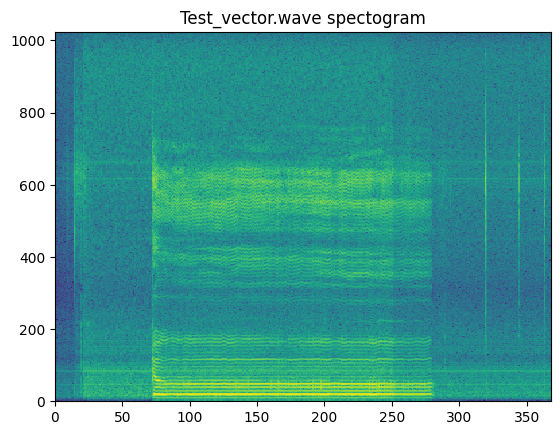

In [38]:
# winddata= data * signal.windows.hamming(len(data))
# fourier = np.abs(np.fft.fft(winddata,n=1024))
# w = 2*np.pi*(np.fft.fftfreq(len(fourier)))
# analog = sampling_rate * w /2/np.pi
# plt.plot(w,np.log(np.abs(fourier)**2)); 
# plt.title("Fourier transform magnitude")
# plt.xlabel("omega from -pi to positive pi")
# plt.ylabel("magnitude")


import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from numpy.fft import fft, ifft

FRAME_SIZE = 1024
ZP_FACTOR = 2
FFT_SIZE = FRAME_SIZE * ZP_FACTOR


################## YOUR CODE HERE ######################
def ece420ProcessFrame(frame):
    curFft = np.zeros(FFT_SIZE)
    window = signal.windows.hamming(FRAME_SIZE) ## this line and next one will need to be different on C++
    temp = frame * window
    temp = np.append(temp, np.zeros((ZP_FACTOR -1) * FRAME_SIZE))
    curFft = np.log10(np.abs(np.fft.fft(temp))**2)
    return curFft[:FRAME_SIZE]/12


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')

numFrames = int(len(data) / FRAME_SIZE)
bmp = np.zeros((numFrames, FRAME_SIZE))

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    curFft = ece420ProcessFrame(frame)
    bmp[i, :] = curFft

plt.figure()
plt.pcolormesh(bmp.T, vmin=0, vmax=1)
plt.axis('tight')
plt.title("Test_vector.wave spectogram")
plt.show()

C:\Users\chazp\AppData\Local\Temp\ipykernel_50328\4085636483.py:27: RuntimeWarning: divide by zero encountered in log10
  curFft = np.log10(np.abs(np.fft.fft(temp))**2)


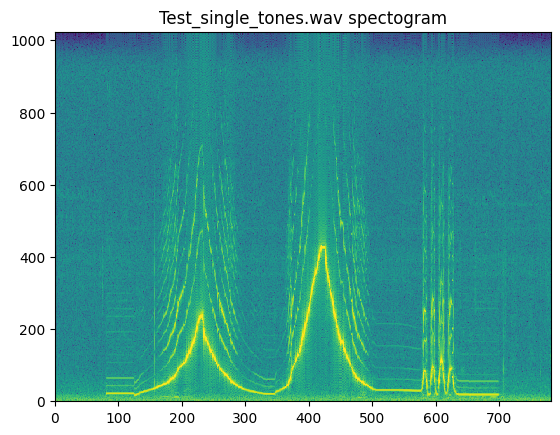

In [40]:
Fs, data = read('test_single_tones.wav')

numFrames = int(len(data) / FRAME_SIZE)
bmp = np.zeros((numFrames, FRAME_SIZE))

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    curFft = ece420ProcessFrame(frame)
    bmp[i, :] = curFft

plt.figure()
plt.pcolormesh(bmp.T, vmin=0, vmax=1)
plt.axis('tight')
plt.title("Test_single_tones.wav spectogram")
plt.show()